From https://github.com/AstroHackWeek/AstroHackWeek2017/blob/master/day5/Inspecting_fits.ipynb

* * *

# A way to inspect fits image cubes 

![badge-img](https://img.shields.io/badge/Made%20at-%23AstroHackWeek-8063d5.svg?style=flat)

This is just a quick hack to take a look at a FITS image cube, inspired by https://github.com/krislars/extinction_slider_hack. 

Things to add : 

- the channel/velocity labelling on each of the channels 
- binning functionality ?
- rms noise estimates 
- looking at FITS file headers sensibly 
- maybe even the spectral line plot for pixels/regions



In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import aplpy
from matplotlib.colors import LogNorm
from IPython import display 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt 
%matplotlib inline

/home/simon/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def fitsSlider(i):
    axim.set_array(image[i,:,:])
    display.display(fig)

In [3]:
fitsfile = '/home/simon/dev/cube_viewer/cube.fits'

In [4]:
apy_fits_obj = get_pkg_data_filename(fitsfile)
hdu = fits.open(apy_fits_obj)[1]
wcs = WCS(hdu.header).celestial

Cube = fits.open( '/home/simon/dev/cube_viewer/cube.fits')
image = Cube[1].data[:,:,:]

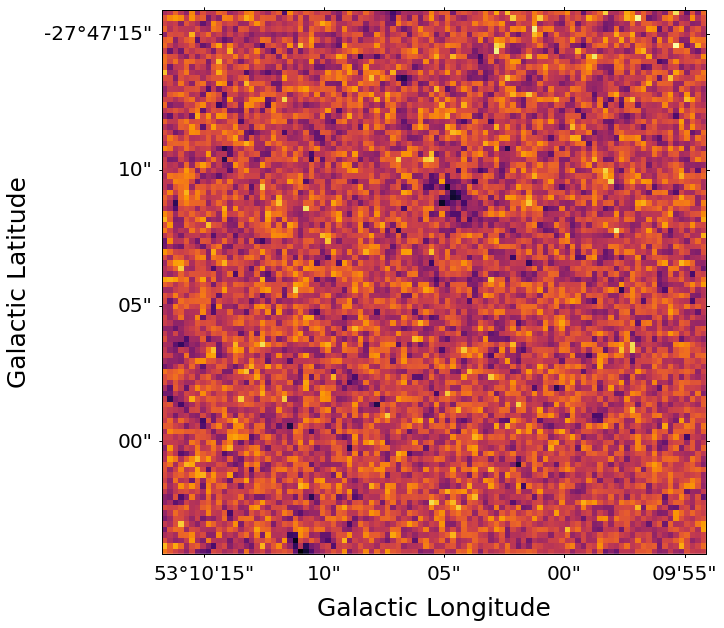

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=wcs)
lon = ax.coords[0]
lat = ax.coords[1]
lat.set_ticklabel(size=20)
lon.set_ticklabel(size=20)
ax.set_xlabel('Galactic Longitude', size=25)
ax.set_ylabel('Galactic Latitude', size=25)
axim = ax.imshow(image[0,:,:], cmap='inferno_r') ; # say > fig to show the figure


In [23]:
interactive_plot = interactive(fitsSlider, i=(0,613,1))
#output.layout.height = '150px'
interactive_plot

interactive(children=(IntSlider(value=306, description='i', max=613), Output()), _dom_classes=('widget-interact',))